As you may not have access to Facebook API, we'll use a dataset provided by Stanford: https://snap.stanford.edu/data/egonets-Facebook.html.

Each network consists of:

- **Nodes (or Vertices)**: The individuals whose network we are building.
- **Edges**: The connection between the nodes. It represents a relationship between the nodes of the network.

In [1]:
import networkx as nx

G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype=int)

In [6]:
print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


(-1.0802239150650084,
 1.1001029894257441,
 -1.0446045855298558,
 1.0910162190213721)

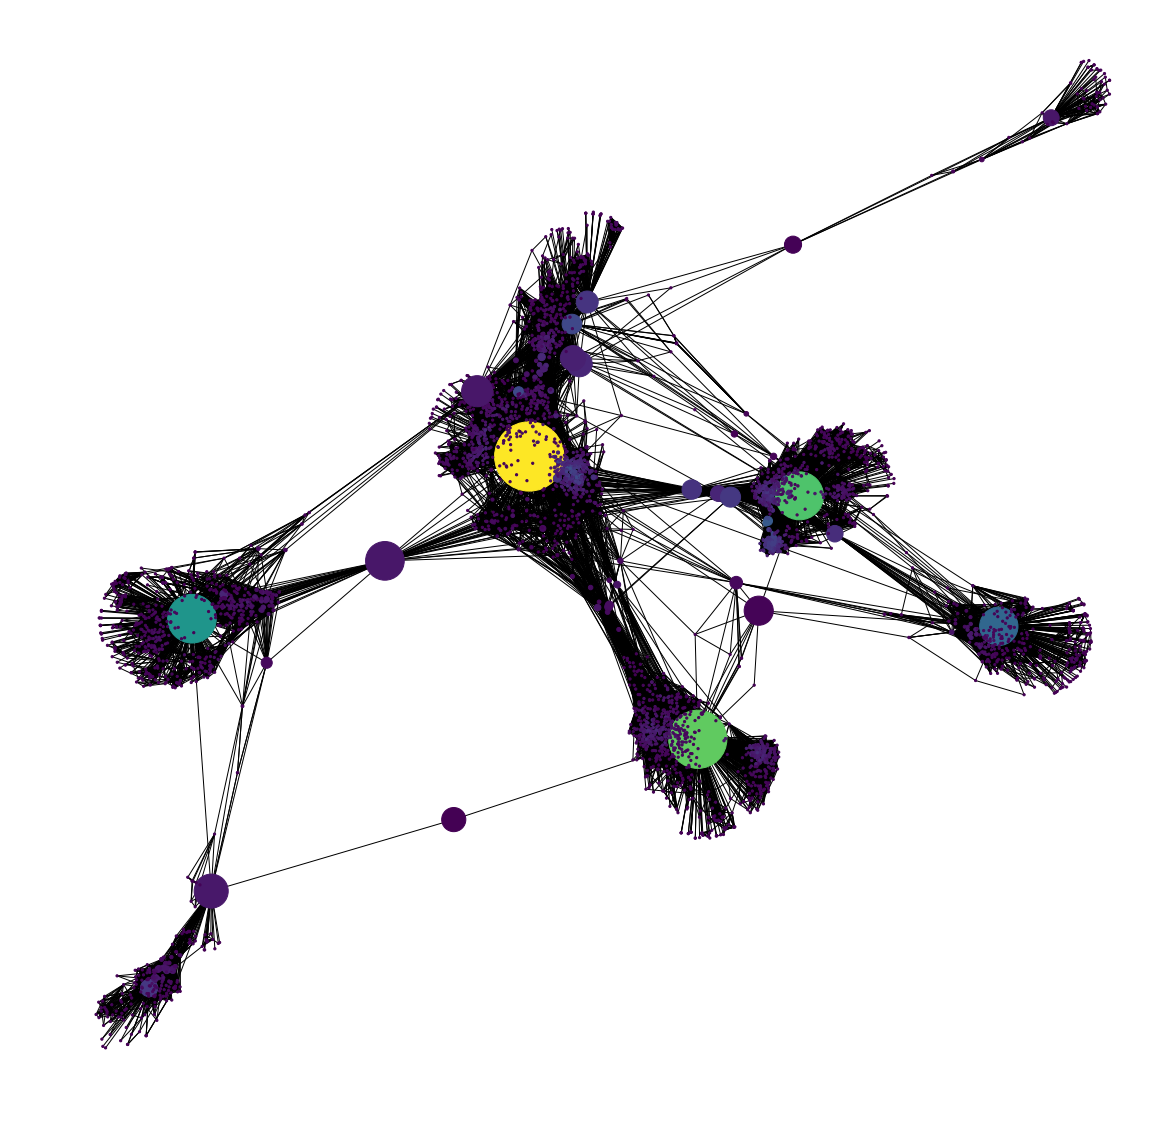

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

#Plot the graph (node color varies with Degree and node size with Betweenness Centrality)
pos = nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)

node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=False, node_color=node_color, node_size=node_size)
plt.axis('off')

#### Degree
Degree of a node defines the number of connections a node has.
`nx.degree(G_symmetric, 'Dev Anand')`

#### Clustering Coefficient
There is a tendency in a social network to form clusters. We can determine the clusters of a node, Local Clustering Coefficient, which is the fraction of pairs of the node's friends (that is connections) that are connected with each other. To determine the local clustering coefficient, we make use of nx.clustering(Graph, Node) function.  
The average clustering coefficient (sum of all the local clustering coefficients divided by the number of nodes) for the symmetric Actor-network is 0.867. We can obtain it using: `nx.average_clustering(G_symmetric)`.

#### Distance
We can also determine the shortest path between two nodes and its length in NetworkX using nx.shortest_path(Graph, Node1, Node2) and nx.shortest_path_length(Graph, Node1, Node2) functions respectively. `nx.shortest_path(G_symmetric, 'Dev Anand', 'Akshay Kumar')`

We can find the distance of a node from every other node in the network using breadth-first search algorithm, starting from that node. networkX provides the function bfs_tree to do it. And so if you try T = nx.bfs_tree(G_symmetric, 'Dev Anand') and now draw this tree, we will get a network structure telling how we can reach other nodes of the network starting from Dev Anand

#### Eccentricity
Eccentricity of a node A is defined as the largest distance between A and all other nodes. It can be found using nx.eccentricity() function. In the symmetric Actor-network, Dev Anand has an eccentricity of 2, and Abhishek Bachchan has an eccentricity of 1 (It is connected to all).

#### Network Influencers
Above we learned some of the network distance measures, they are useful in knowing how the information will spread through the network. In this section, we will learn how to find the most important nodes (individuals) in the network. These parameters are called as centrality measures.

Remember that popular girl from your high school or the schools top baseball player. These were the people who had the power to make your high school experience hell or heaven. What gave them this power? Centrality Measures can help us in identifying popularity, most liked, and biggest influencers within the network.

#### Degree Centrality
The people most popular or more liked usually are the ones who have more friends. Degree centrality is a measure of the number of connections a particular node has in the network. It is based on the fact that important nodes have many connections. NetworkX has the function degree_centrality() to calculate the degree centrality of all the nodes of a network.

#### Eigenvector Centrality
It is not just how many individuals one is connected too, but the type of people one is connected with that can decide the importance of a node. In Delhi Roads whenever the traffic police capture a person for breaking the traffic rule, the first sentence that traffic police hears is "Do you know whom I am related to?".

Eigenvector centrality is a measure of exactly this. It decides that a node is important if it is connected to other important nodes. We can use the eigenvector_centrality() function of NetworkX to calculate eigenvector centrality of all the nodes in a network.

The Google's Pagerank algorithm is a variant of Eigenvector centrality algorithm.

#### Betweenness Centrality
The Betweenness Centrality is the centrality of control. It represents the frequency at which a point occurs on the geodesic (shortest paths) that connected pair of points. It quantifies how many times a particular node comes in the shortest chosen path between two other nodes. The nodes with high betweenness centrality play a significant role in the communication/information flow within the network. The nodes with high betweenness centrality can have a strategic control and influence on others. An individual at such a strategic position can influence the whole group, by either withholding or coloring the information in transmission.

Networkx has the function betweenness_centrality() to measure it for the network. It has options to select if we want betweenness values to be normalized or not, weights to be included in centrality calculation or not, and to include the endpoints in the shortest path counts or not.

In [10]:
sorted(betCent, key=betCent.get, reverse=True)[:5]

[107, 1684, 3437, 1912, 1085]